<a href="https://colab.research.google.com/github/SamillyNunes/machine-learning-study/blob/main/k_medoids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Medoids
É um agrupador - cluster - em que sua principal diferença é que o centro, ao invés de ser elementos aleatórios (como no k-means) são pontos reais de dados

In [2]:
!pip install pyclustering

     |████████████████████████████████| 2.6MB 5.1MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-cp37-none-any.whl size=2395105 sha256=2ce6c90b516a4e8612b4be2bba7a596dd8d1cd7c2ff3792ac60396e3b485ba29
  Stored in directory: /root/.cache/pip/wheels/d4/98/57/2f53b94ccf47805e95e189e8a18f58a51ff61d67955b79c60d
Successfully built pyclustering


In [3]:
#imports
from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.cluster import cluster_visualizer

In [20]:
# dados
iris = datasets.load_iris()

In [21]:
# confi dos parametros do k-medoids utilizando somente as duas primeiras colunas da base de dados por causa da visualizacao apenas
# 3,12, 20 sao os ptos de inicializacao= indices dos registros, ou seja, serao usados como centro
cluster = kmedoids(iris.data[:,0:2], [3,12,20])

#visualizacao dos ptos escolhidos
cluster.get_medoids()

[3, 12, 20]

In [22]:
# algoritmo para o agrupamento
cluster.process()
previsoes = cluster.get_clusters()
medoides = cluster.get_medoids()

# a previsoes eh uma lista de 3 elementos, justamente os 3 medoides, cada lista eh um cluster e os elementos sao os indices dos dados q fazem parte desse cluster
# previsoes

medoides

[112, 82, 7]

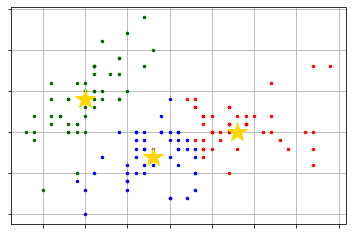

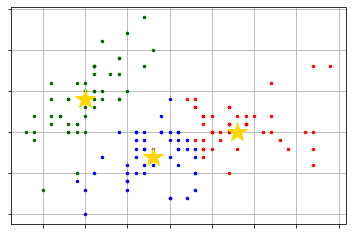

In [23]:
# visualizacao
v = cluster_visualizer()
v.append_clusters(previsoes, iris.data[:,0:2])
v.append_cluster(medoides, data=iris.data[:,0:2], marker="*", markersize=20)
v.show() 

In [24]:
# criar, agora, duas listas: uma para os grupos reais do bd e outra com os valores dos grupos, para poder visualizar na matriz
lista_previsoes = []
lista_real = []

for i in range(len(previsoes)): # vai rodar para cada cluster
  for j in range(len(previsoes[i])): # para cada elemento no cluster
    lista_previsoes.append(i)
    lista_real.append(iris.target[previsoes[i][j]])

In [25]:
lista_previsoes = np.asarray(lista_previsoes)
lista_real = np.asarray(lista_real)


In [26]:
confusao = confusion_matrix(lista_real,lista_previsoes)
confusao

array([[ 0,  0, 50],
       [12, 38,  0],
       [35, 14,  1]])